In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_listing = pd.read_csv("listings.csv")

# first 5 rows of the dataframe
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,NaN
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,NaN,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,NaN


In [5]:
# number of rows
print(f"Rows: {df_listing.shape[0]}")

# number of columns
print(f"Columns: {df_listing.shape[1]}")

# shape of the data
print(f"Shape: {df_listing.shape}")

Rows: 96651
Columns: 18
Shape: (96651, 18)


In [6]:
# check the size and structure
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [7]:
# identify the missing values
print(f"Total missing values: {df_listing.isnull().sum()}")

Total missing values: id                                    0
name                                  0
host_id                               0
host_name                            40
neighbourhood_group               96651
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             33967
minimum_nights                        0
number_of_reviews                     0
last_review                       25164
reviews_per_month                 25164
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           96651
dtype: int64


In [8]:
# percentage of missing values
missing_percentage = (df_listing.isnull().sum() / len(df_listing)) * 100

In [9]:
print(f"Percentage of missing values:\n{missing_percentage}")

Percentage of missing values:
id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.041386
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                              35.143972
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        26.035944
reviews_per_month                  26.035944
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64


In [11]:
# check the data types
df_listing.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [13]:
# detect duplicate daa
df_listing.duplicated().sum()

np.int64(0)

In [14]:
# basic descriptive analysis
df_listing.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,9.665100e+04,9.665100e+04,0.0,96651.000000,96651.000000,62684.000000,96651.000000,96651.000000,71487.000000,96651.000000,96651.000000,96651.000000,0.0
mean,6.526020e+17,2.091790e+08,NaN,51.509818,-0.127087,213.366058,5.429504,20.891734,0.958877,16.389370,139.697365,5.634665,NaN
std,5.708808e+17,2.141266e+08,NaN,0.048945,0.100853,860.901557,23.315086,49.922266,1.282595,53.299577,137.426817,11.951389,NaN
min,1.391300e+04,2.594000e+03,NaN,51.295937,-0.496760,6.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.955518e+07,2.673176e+07,NaN,51.484240,-0.189060,75.000000,1.000000,0.000000,0.150000,1.000000,0.000000,0.000000,NaN
50%,8.123206e+17,1.128684e+08,NaN,51.513791,-0.126990,135.000000,2.000000,4.000000,0.500000,2.000000,93.000000,0.000000,NaN
75%,1.197378e+18,4.063762e+08,NaN,51.539099,-0.067880,225.000000,4.000000,19.000000,1.230000,8.000000,270.000000,6.000000,NaN
max,1.439673e+18,7.001298e+08,NaN,51.682630,0.278960,74100.000000,1125.000000,1855.000000,38.410000,495.000000,365.000000,355.000000,NaN


In [15]:
df_listing.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,9.665100e+04,96651,9.665100e+04,96611,0.0,96651,96651.000000,96651.000000,96651,62684.000000,96651.000000,96651.000000,71487,71487.000000,96651.000000,96651.000000,96651.000000,0.0
unique,NaN,93001,NaN,16658,NaN,33,NaN,NaN,4,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN
top,NaN,Home away from home,NaN,James,NaN,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2025-06-08,NaN,NaN,NaN,NaN,NaN
freq,NaN,29,NaN,960,NaN,11367,NaN,NaN,62456,NaN,NaN,NaN,2101,NaN,NaN,NaN,NaN,NaN
mean,6.526020e+17,NaN,2.091790e+08,NaN,NaN,NaN,51.509818,-0.127087,NaN,213.366058,5.429504,20.891734,NaN,0.958877,16.389370,139.697365,5.634665,NaN
std,5.708808e+17,NaN,2.141266e+08,NaN,NaN,NaN,0.048945,0.100853,NaN,860.901557,23.315086,49.922266,NaN,1.282595,53.299577,137.426817,11.951389,NaN
min,1.391300e+04,NaN,2.594000e+03,NaN,NaN,NaN,51.295937,-0.496760,NaN,6.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.955518e+07,NaN,2.673176e+07,NaN,NaN,NaN,51.484240,-0.189060,NaN,75.000000,1.000000,0.000000,NaN,0.150000,1.000000,0.000000,0.000000,NaN
50%,8.123206e+17,NaN,1.128684e+08,NaN,NaN,NaN,51.513791,-0.126990,NaN,135.000000,2.000000,4.000000,NaN,0.500000,2.000000,93.000000,0.000000,NaN
75%,1.197378e+18,NaN,4.063762e+08,NaN,NaN,NaN,51.539099,-0.067880,NaN,225.000000,4.000000,19.000000,NaN,1.230000,8.000000,270.000000,6.000000,NaN


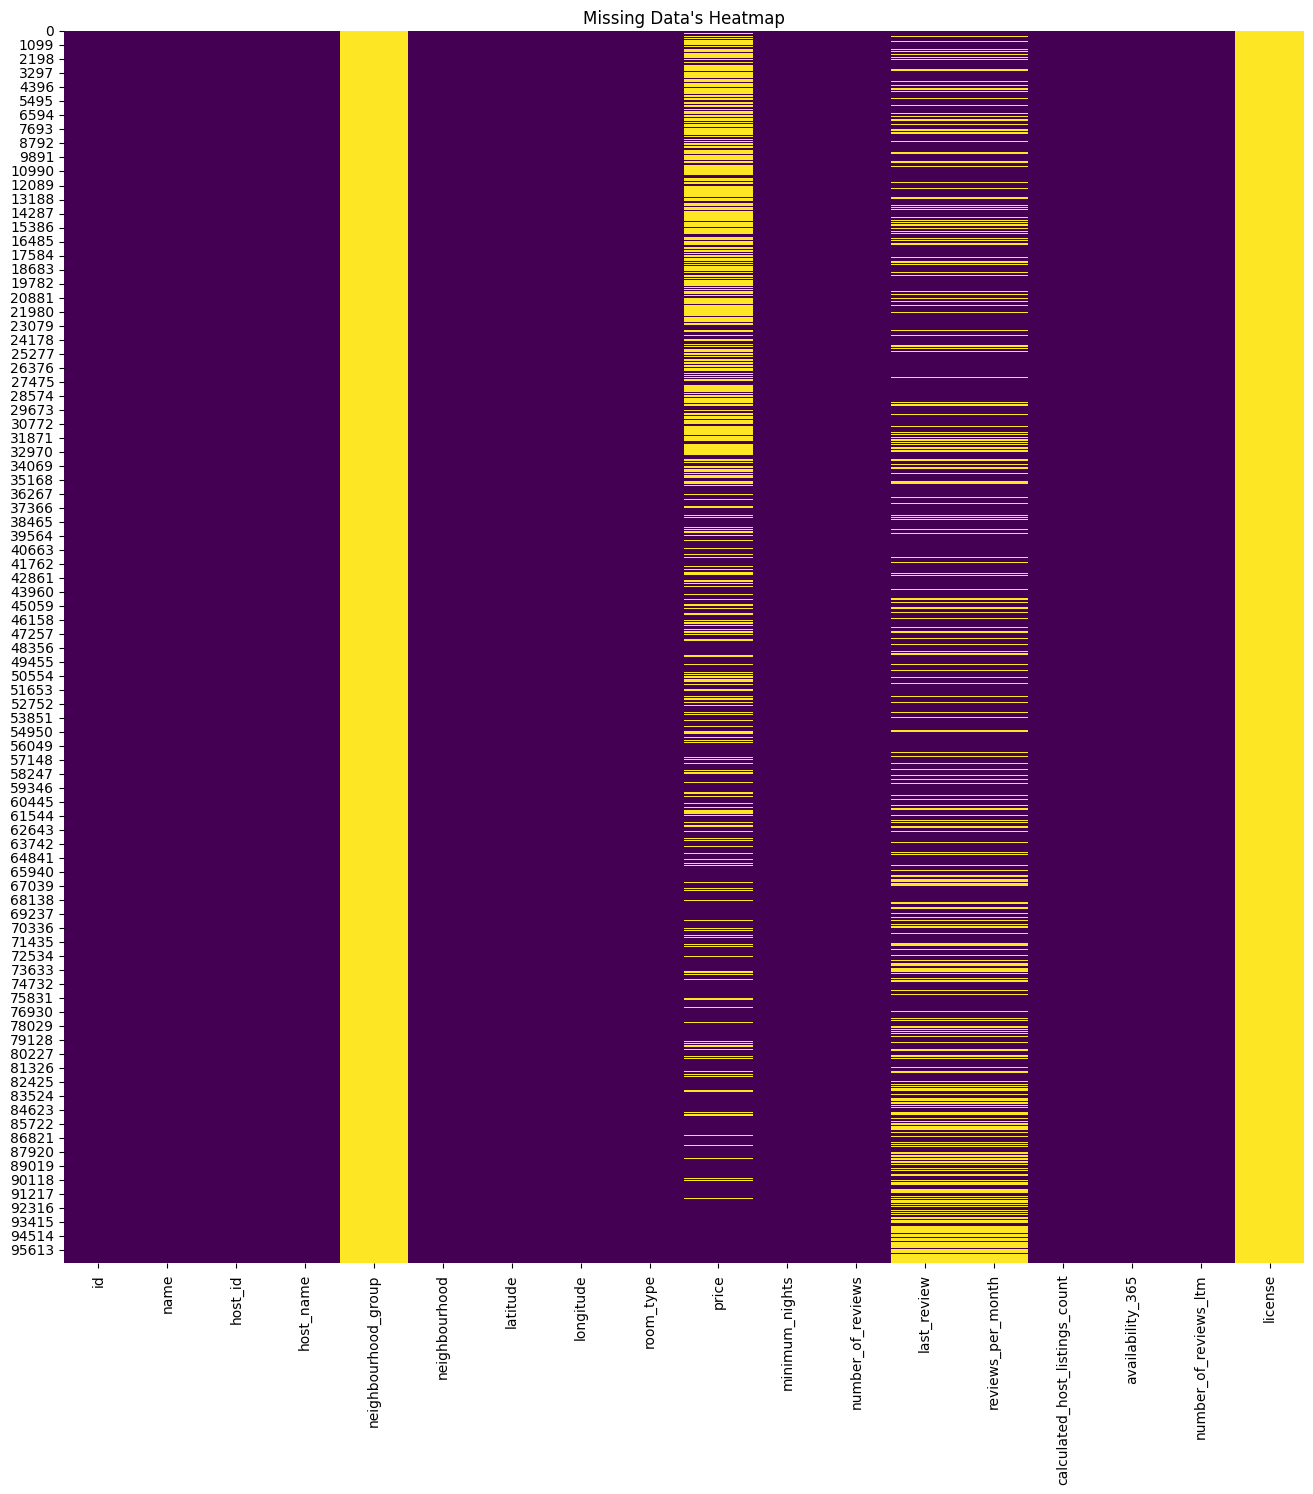

In [17]:
plt.figure(figsize=(16,16))
sns.heatmap(df_listing.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data's Heatmap")
plt.show()

In [18]:
# Shallow copy
df = df_listing.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,NaN
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,NaN,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,NaN
